Importing libraries

In [1]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('retail_sales_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store ID          500 non-null    object 
 1   Date              500 non-null    object 
 2   Total Sales       500 non-null    float64
 3   Region            500 non-null    object 
 4   Product Category  500 non-null    object 
 5   Units Sold        500 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


,Store ID,Date,Total Sales,Region,Product Category,Units Sold
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86


In [3]:
# Transform date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

Investigating our Stores. How many are there? Are they present in all the regions?

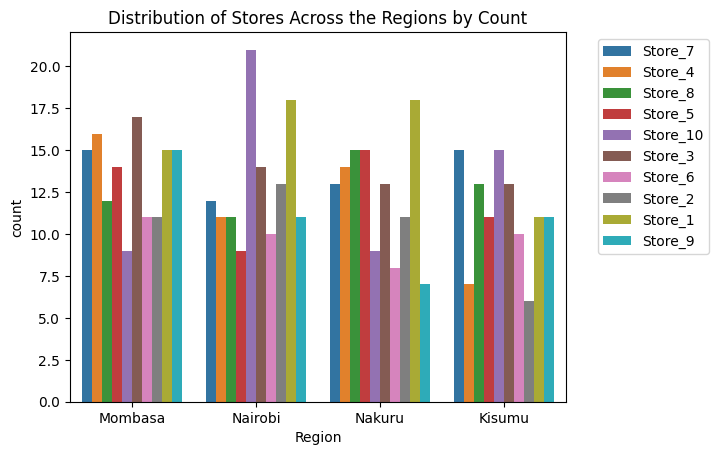

In [4]:
sns.countplot(x = 'Region', data = df, hue = 'Store ID');
plt.title('Distribution of Stores Across the Regions by Count');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

What are the categories? Do all the stores have all categories across the regions?

In [5]:
df['Product Category'].value_counts()

Product Category
Clothing         134
Home & Living    130
Electronics      120
Groceries        116
Name: count, dtype: int64

In [6]:
df.pivot_table(index = 'Product Category', values = 'Store ID', columns = 'Region', aggfunc = 'count')

Region,Kisumu,Mombasa,Nairobi,Nakuru
Product Category,,,,
Clothing,29,37,34,34
Electronics,27,33,34,26
Groceries,28,25,34,29
Home & Living,28,40,28,34


Do product categories do well in some regions compared to others? Which products sell better? Which products generate more sales, and is this consistent across the regions?

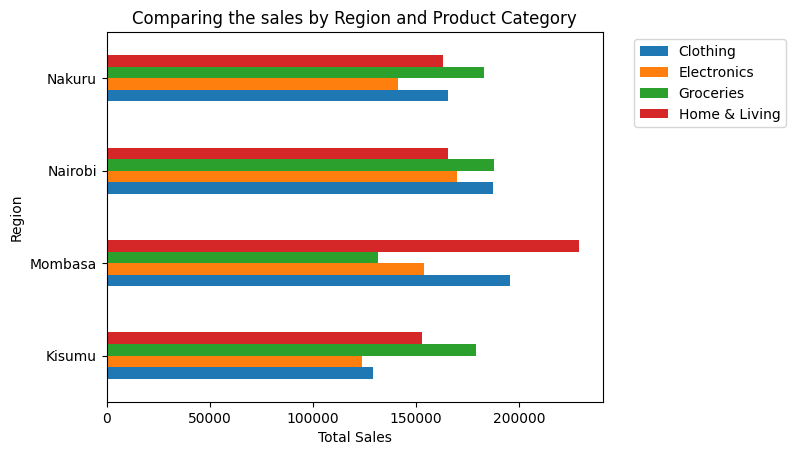

Product Category   Clothing  Electronics  Groceries  Home & Living       Total
Region                                                                        
Kisumu            129275.54    123550.21  179173.44      152774.22   584773.41
Mombasa           195691.11    153850.68  131635.25      228887.06   710064.10
Nairobi           187363.28    169979.89  187695.55      165218.12   710256.84
Nakuru            165625.77    141432.69  182911.83      163193.24   653163.53
Total             677955.70    588813.47  681416.07      710072.64  2658257.88


In [7]:
df.pivot_table(index = 'Region', values = 'Total Sales', columns = 'Product Category', aggfunc = sum).plot(kind = 'barh');
plt.xlabel('Total Sales');
plt.title('Comparing the sales by Region and Product Category')
plt.legend(bbox_to_anchor=(1.05, 1));
plt.show();
print(df.pivot_table(index = 'Region', values = 'Total Sales', columns = 'Product Category', 
                     aggfunc = sum, margins = True, margins_name = 'Total'))

Mombasa is outselling other regions in Clothing and Home & Living; but records the lowest sales in groceries  
Nairobi leads in Groceries and Electronics  
Kisumu has the lowest sales in all categories except for Groceries edging out only Mombasa

In [8]:
df.pivot_table(index = 'Region', values = 'Total Sales', columns = 'Store ID', aggfunc = 'sum', margins= True)

Store ID,Store_1,Store_10,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,All
Region,,,,,,,,,,,
Kisumu,67723.98,67272.06,36336.86,63876.15,30083.57,53095.50,70547.99,72269.76,75783.02,47784.52,584773.41
Mombasa,87590.13,44181.44,75429.20,96887.09,80930.74,78518.87,54058.53,74934.03,47449.62,70084.45,710064.10
Nairobi,98442.48,100780.21,72784.08,77683.08,42604.40,58038.02,69037.48,68656.69,70863.53,51366.87,710256.84
Nakuru,92294.60,51357.80,64336.75,72237.88,69513.32,77016.42,42480.58,65577.64,85179.24,33169.30,653163.53
All,346051.19,263591.51,248886.89,310684.20,223132.03,266668.81,236124.58,281438.12,279275.41,202405.14,2658257.88


Store_1 outlets had the highest sales of all.  
Stores in Kisumu had the lowest sales overall.  
Store_10 in Nairobi has the highest overall sales.  
Store_4 in Kisumu had the lowestr overall sales.

Investigating the unit prices of products

In [9]:
df['Unit cost'] = df['Total Sales']/ df['Units Sold']
df.head()

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92,44.358370
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86,56.923953
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14,240.220714
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71,107.074507
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86,61.346977


In [10]:
df.pivot_table(index = 'Region', values = 'Unit cost', columns = 'Product Category',
                aggfunc = 'mean', margins = True, margins_name = 'Avg. Price')

Product Category,Clothing,Electronics,Groceries,Home & Living,Avg. Price
Region,,,,,
Kisumu,195.222985,170.161894,178.446091,145.718521,172.611132
Mombasa,248.773279,327.356762,208.340003,281.833167,270.290454
Nairobi,196.950911,159.449722,371.923075,425.313905,282.090734
Nakuru,195.498141,230.630581,728.394998,309.989919,360.214993
Avg. Price,210.517505,223.456916,379.084742,290.783784,273.599795


This may mean that even though Kisumu has the lowest overall sales, it may be because the commodities are priced lower there.  
On the other hand, Nakuru's grocery prices need to be investigated if we assume they are selling the same products as the other stores  
Given that the average grocery unit price is close to double the average.

In [11]:
(df.pivot_table(index = ['Store ID', 'Region'], values = 'Unit cost', columns = 'Product Category',
                aggfunc = 'mean', margins = True, margins_name = 'Avg. Price')
                .style.background_gradient(cmap='RdYlGn_r', axis=None)) # To highlight extreme outliers


In [12]:
df[(df['Product Category'] == 'Groceries') & (df['Region'] == 'Nakuru') & (df['Store ID'] == 'Store_10')]

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost
5,Store_10,2024-08-04,2706.02,Nakuru,Groceries,5,541.204000
325,Store_10,2024-05-06,4502.89,Nakuru,Groceries,33,136.451212


Time Trends

In [13]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df.head()

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost,Month,Day
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92,44.358370,December,Thursday
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86,56.923953,October,Saturday
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14,240.220714,September,Sunday
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71,107.074507,March,Saturday
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86,61.346977,March,Sunday


Mapping sales in categories across time

In [14]:
df.pivot_table(index = 'Day', values = 'Units Sold', columns = 'Product Category', aggfunc = 'sum', margins = True)

Product Category,Clothing,Electronics,Groceries,Home & Living,All
Day,,,,,
Friday,1104,602,848,871,3425
Monday,830,990,749,725,3294
Saturday,1265,694,1318,819,4096
Sunday,927,1229,719,1012,3887
Thursday,868,900,759,1103,3630
Tuesday,1080,1097,738,560,3475
Wednesday,484,799,286,1251,2820
All,6558,6311,5417,6341,24627


In [15]:
df.pivot_table(index = 'Month', values = 'Units Sold', columns = 'Product Category', aggfunc = 'sum', margins = True)

Product Category,Clothing,Electronics,Groceries,Home & Living,All
Month,,,,,
April,418,423,330,466,1637
August,819,451,584,807,2661
December,425,746,430,369,1970
February,601,145,423,562,1731
January,760,787,388,620,2555
July,622,564,393,287,1866
June,361,577,542,532,2012
March,922,413,364,360,2059
May,634,489,444,854,2421


In [16]:
df.groupby(['Date', 'Product Category'])['Total Sales'].sum()

Date        Product Category
2024-01-01  Clothing            13005.54
            Electronics          5865.99
            Home & Living        9344.79
2024-01-03  Home & Living        6956.65
2024-01-04  Clothing             7229.45
                                  ...   
2024-12-28  Clothing             7970.28
2024-12-29  Home & Living        8469.53
2024-12-30  Clothing             8690.21
            Groceries           14457.93
2024-12-31  Clothing              674.71
Name: Total Sales, Length: 414, dtype: float64

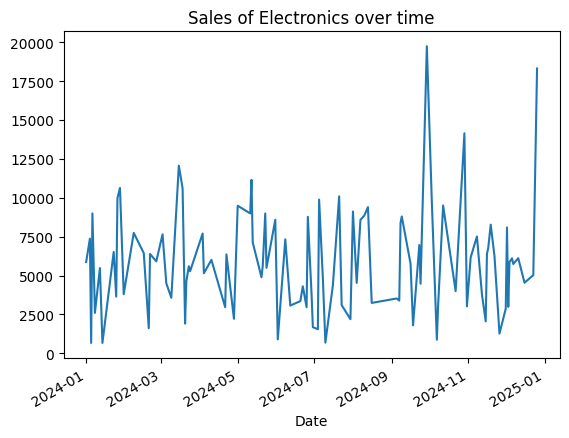

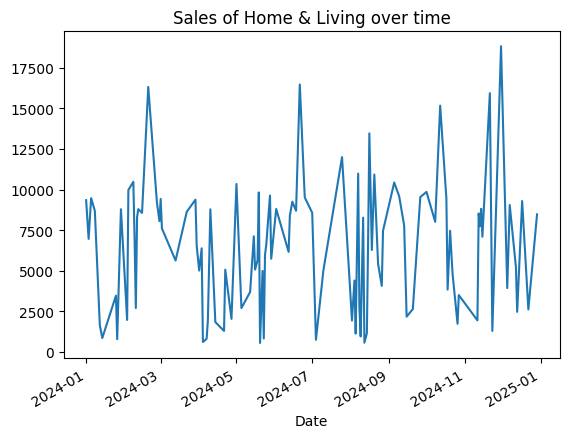

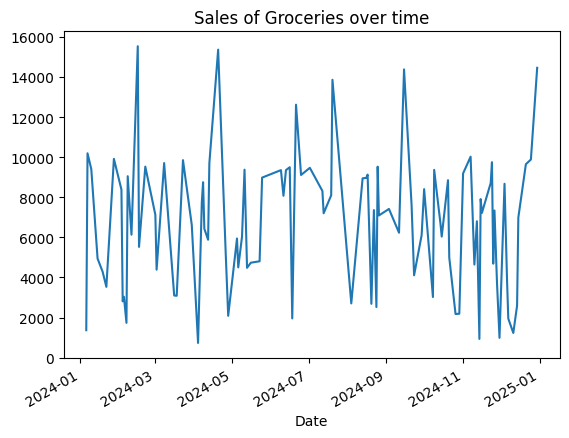

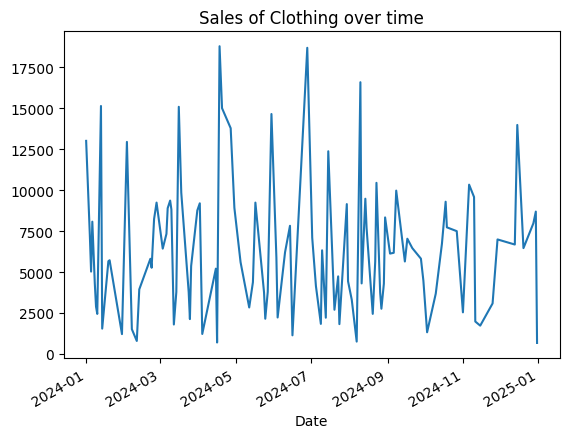

In [17]:
for product in df['Product Category'].unique():
    df[df['Product Category'] == product].groupby('Date')['Total Sales'].sum().plot()
    plt.title(f"Sales of {product} over time");
    plt.show();

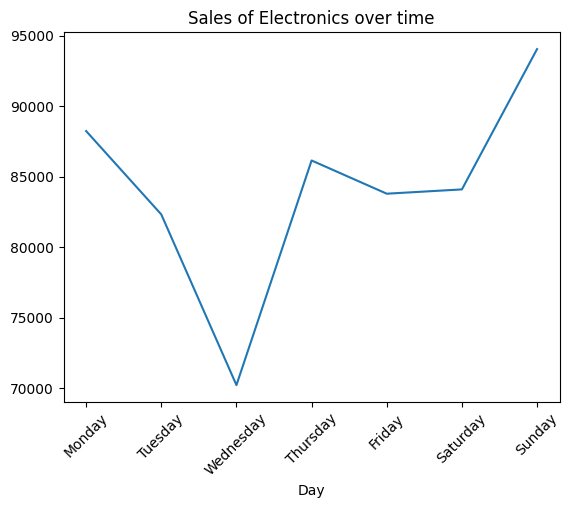

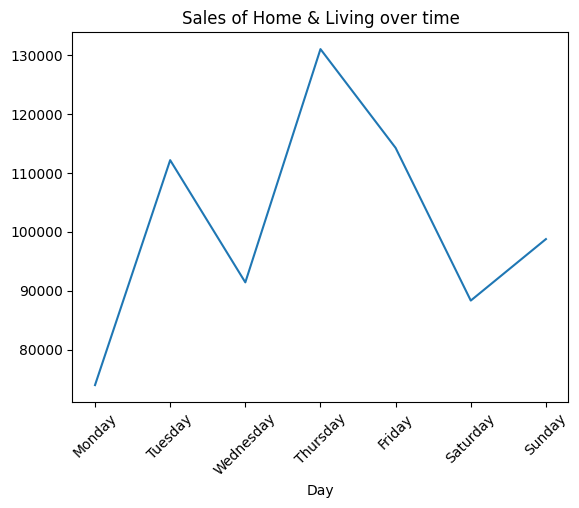

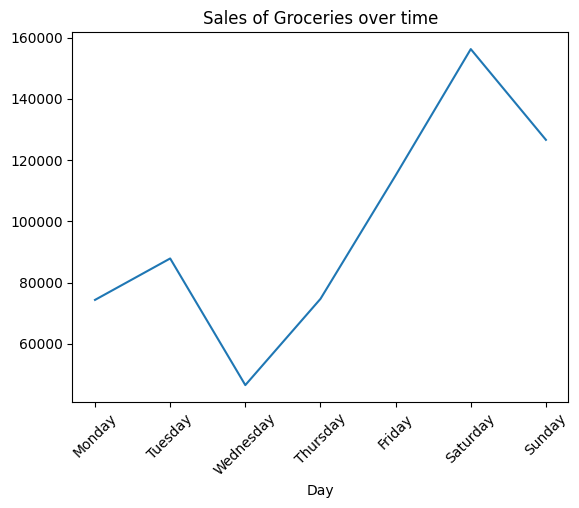

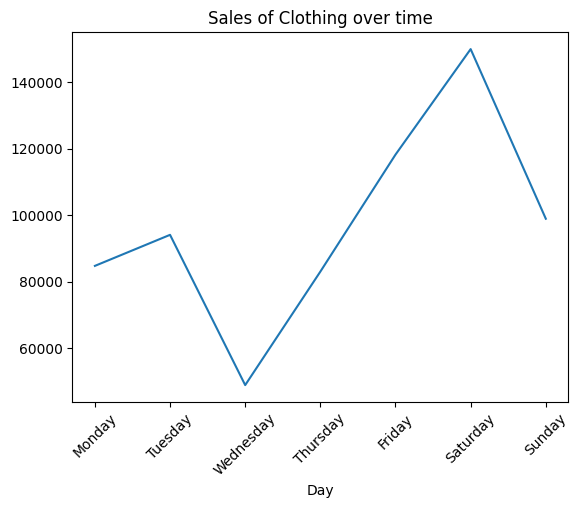

In [18]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for product in df['Product Category'].unique():
    df[df['Product Category'] == product].groupby('Day')['Total Sales'].sum().reindex(weekday_order).plot()
    plt.xticks(rotation = 45)
    plt.title(f"Sales of {product} over time");
    plt.show();

In [19]:
df.pivot_table(index = 'Region', values = 'Units Sold', columns = 'Product Category', aggfunc = 'sum')

Product Category,Clothing,Electronics,Groceries,Home & Living
Region,,,,
Kisumu,1545,1433,1603,1446
Mombasa,1701,1910,1374,2021
Nairobi,1569,1728,1536,1169
Nakuru,1743,1240,904,1705


In [20]:
df.groupby(['Region', 'Date'])['Total Sales'].sum()

Region  Date      
Kisumu  2024-01-04    14601.94
        2024-01-05     5029.21
        2024-01-08     4318.34
        2024-01-22     3531.45
        2024-01-25     3644.13
                        ...   
Nakuru  2024-12-15    12201.78
        2024-12-17     9289.86
        2024-12-25     9882.85
        2024-12-29     8469.53
        2024-12-30    20428.87
Name: Total Sales, Length: 416, dtype: float64

In [21]:
df.pivot_table(index = ['Date', 'Region'], values = 'Units Sold', aggfunc = 'sum')

Units Sold
Date       Region             
2024-01-01 Mombasa          21
           Nairobi         126
           Nakuru          149
2024-01-03 Nakuru           90
2024-01-04 Kisumu           28
...                        ...
2024-12-28 Mombasa          61
2024-12-29 Nakuru           79
2024-12-30 Nairobi          15
           Nakuru          129
2024-12-31 Nairobi          52

[416 rows x 1 columns]

In [22]:
# Challenge1: Group by month and region, aggregate sales and units

df.groupby(['Month', 'Region'])[['Total Sales', 'Units Sold']].sum()

Total Sales  Units Sold
Month     Region                          
April     Kisumu      20716.92         189
          Mombasa     47876.89         584
          Nairobi     65729.63         380
          Nakuru      64536.97         484
August    Kisumu      78871.33         814
          Mombasa     71015.61         698
          Nairobi     43043.66         328
          Nakuru      76042.43         821
December  Kisumu      35971.12         364
          Mombasa     47019.67         429
          Nairobi     48527.30         629
          Nakuru      78926.41         548
February  Kisumu      45320.22         512
          Mombasa     95204.64         724
          Nairobi     50278.62         307
          Nakuru      38058.55         188
January   Kisumu      34993.98         381
          Mombasa     73897.18         877
          Nairobi     79009.09         631
          Nakuru      44236.61         666
July      Kisumu      43613.74         574
          Mombasa     40024.00         491
          Nairobi     33402.45         316
          Nakuru      54261.89         485
June      Kisumu      29630.74         276
          Mombasa     72323.35         714
          Nairobi     40836.30         468
          Nakuru      62565.08         554
March     Kisumu      76918.16         719
          Mombasa     16383.23         249
          Nairobi    100759.57         791
          Nakuru      44226.46         300
May       Kisumu      18275.18         155
          Mombasa    116900.65        1246
          Nairobi     81570.86         683
          Nakuru      35139.90         337
November  Kisumu      45453.66         384
          Mombasa     82244.26         610
          Nairobi     60232.65         523
          Nakuru      48893.78         319
October   Kisumu     101656.10        1195
          Mombasa     20077.84         128
          Nairobi     37026.30         399
          Nakuru      45628.29         429
September Kisumu      53352.26         464
          Mombasa     27096.78         256
          Nairobi     69840.41         547
          Nakuru      60647.16         461

In [23]:
# Challenge1: Filter data for the year 2024

df[df['Date']>'2024-04-01']

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost,Month,Day
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92,44.358370,December,Thursday
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86,56.923953,October,Saturday
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14,240.220714,September,Sunday
5,Store_10,2024-08-04,2706.02,Nakuru,Groceries,5,541.204000,August,Sunday
6,Store_3,2024-12-07,9045.96,Kisumu,Home & Living,55,164.472000,December,Saturday
...,...,...,...,...,...,...,...,...,...
493,Store_7,2024-08-24,2524.49,Mombasa,Groceries,99,25.499899,August,Saturday
496,Store_7,2024-10-22,4001.00,Nairobi,Electronics,49,81.653061,October,Tuesday
497,Store_7,2024-11-23,8711.40,Kisumu,Groceries,64,136.115625,November,Saturday
498,Store_9,2024-10-21,4995.49,Nakuru,Groceries,32,156.109062,October,Monday


In [24]:
# Challenge2: Group by Region, Product Category, and Month, then aggregate sales and units
df.groupby(['Region', 'Product Category', 'Month'])[['Total Sales', 'Units Sold']].sum().reset_index()

,Region,Product Category,Month,Total Sales,Units Sold
0,Kisumu,Clothing,April,12525.03,86
1,Kisumu,Clothing,August,3383.68,72
2,Kisumu,Clothing,February,6296.97,212
3,Kisumu,Clothing,January,16577.00,211
4,Kisumu,Clothing,July,20601.87,166
...,...,...,...,...,...
168,Nakuru,Home & Living,March,9207.62,92
169,Nakuru,Home & Living,May,20528.87,128
170,Nakuru,Home & Living,November,8809.67,19
171,Nakuru,Home & Living,October,13296.11,94


In [25]:
# Challenge1: Group by Region, Product Category, and Month to get total sales and units sold

df.groupby(['Region', 'Product Category', 'Month'])[['Total Sales', 'Units Sold']].sum()

Total Sales  Units Sold
Region Product Category Month                             
Kisumu Clothing         April         12525.03          86
                        August         3383.68          72
                        February       6296.97         212
                        January       16577.00         211
                        July          20601.87         166
...                                        ...         ...
Nakuru Home & Living    March          9207.62          92
                        May           20528.87         128
                        November       8809.67          19
                        October       13296.11          94
                        September     12645.66         192

[173 rows x 2 columns]

In [26]:
df[df['Region'].isin(['Nairobi', 'Mombasa'])]

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost,Month,Day
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92,44.358370,December,Thursday
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86,56.923953,October,Saturday
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14,240.220714,September,Sunday
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71,107.074507,March,Saturday
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86,61.346977,March,Sunday
...,...,...,...,...,...,...,...,...,...
489,Store_2,2024-03-18,9847.79,Nairobi,Clothing,38,259.152368,March,Monday
491,Store_7,2024-05-11,8993.94,Nairobi,Electronics,59,152.439661,May,Saturday
493,Store_7,2024-08-24,2524.49,Mombasa,Groceries,99,25.499899,August,Saturday
496,Store_7,2024-10-22,4001.00,Nairobi,Electronics,49,81.653061,October,Tuesday


In [27]:
# Challenge3: Aggregate total sales and units sold monthly by Region
df.groupby(['Month', 'Region'])[['Total Sales', 'Units Sold']].sum()

Total Sales  Units Sold
Month     Region                          
April     Kisumu      20716.92         189
          Mombasa     47876.89         584
          Nairobi     65729.63         380
          Nakuru      64536.97         484
August    Kisumu      78871.33         814
          Mombasa     71015.61         698
          Nairobi     43043.66         328
          Nakuru      76042.43         821
December  Kisumu      35971.12         364
          Mombasa     47019.67         429
          Nairobi     48527.30         629
          Nakuru      78926.41         548
February  Kisumu      45320.22         512
          Mombasa     95204.64         724
          Nairobi     50278.62         307
          Nakuru      38058.55         188
January   Kisumu      34993.98         381
          Mombasa     73897.18         877
          Nairobi     79009.09         631
          Nakuru      44236.61         666
July      Kisumu      43613.74         574
          Mombasa     40024.00         491
          Nairobi     33402.45         316
          Nakuru      54261.89         485
June      Kisumu      29630.74         276
          Mombasa     72323.35         714
          Nairobi     40836.30         468
          Nakuru      62565.08         554
March     Kisumu      76918.16         719
          Mombasa     16383.23         249
          Nairobi    100759.57         791
          Nakuru      44226.46         300
May       Kisumu      18275.18         155
          Mombasa    116900.65        1246
          Nairobi     81570.86         683
          Nakuru      35139.90         337
November  Kisumu      45453.66         384
          Mombasa     82244.26         610
          Nairobi     60232.65         523
          Nakuru      48893.78         319
October   Kisumu     101656.10        1195
          Mombasa     20077.84         128
          Nairobi     37026.30         399
          Nakuru      45628.29         429
September Kisumu      53352.26         464
          Mombasa     27096.78         256
          Nairobi     69840.41         547
          Nakuru      60647.16         461

In [28]:
# Analyze the trend in the average number of units sold per week throughout 2024 
# for the Electronics product category in the Mombasa and Nairobi regions using the retail_sales_data dataset.

In [29]:
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost,Month,Day,Week
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92,44.358370,December,Thursday,52
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86,56.923953,October,Saturday,41
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14,240.220714,September,Sunday,39
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71,107.074507,March,Saturday,9
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86,61.346977,March,Sunday,12


In [30]:
df.groupby('Week')['Units Sold'].mean()

Week
1     45.217391
2     46.307692
3     63.400000
4     56.900000
5     53.222222
6     56.083333
7     28.625000
8     33.000000
9     42.200000
10    60.777778
11    45.750000
12    47.181818
13    59.285714
14    38.600000
15    42.500000
16    46.545455
17    46.875000
18    52.333333
19    48.666667
20    45.800000
21    46.200000
22    64.500000
23    42.600000
24    57.454545
25    53.000000
26    62.111111
27    35.142857
28    62.333333
29    57.888889
30    55.600000
31    54.166667
32    50.000000
33    50.285714
34    46.454545
35    50.666667
36    53.636364
37    36.200000
38    53.166667
39    45.222222
40    47.400000
41    57.500000
42    61.333333
43    44.571429
44    53.333333
45    30.375000
46    47.250000
47    45.142857
48    44.363636
49    52.636364
50    41.700000
51    56.600000
52    57.250000
Name: Units Sold, dtype: float64

In [31]:
df.groupby(['Region', 'Product Category', 'Date'])['Total Sales'].sum()

Region  Product Category  Date      
Kisumu  Clothing          2024-01-04    7229.45
                          2024-01-05    5029.21
                          2024-01-08    4318.34
                          2024-02-07    1516.32
                          2024-02-11     795.77
                                         ...   
Nakuru  Home & Living     2024-10-18    3831.76
                          2024-11-14    8809.67
                          2024-12-05    3929.25
                          2024-12-17    9289.86
                          2024-12-29    8469.53
Name: Total Sales, Length: 480, dtype: float64

In [34]:
df.groupby(['Region', 'Product Category', 'Date'])['Total Sales'].sum()

Region  Product Category  Date      
Kisumu  Clothing          2024-01-04    7229.45
                          2024-01-05    5029.21
                          2024-01-08    4318.34
                          2024-02-07    1516.32
                          2024-02-11     795.77
                                         ...   
Nakuru  Home & Living     2024-10-18    3831.76
                          2024-11-14    8809.67
                          2024-12-05    3929.25
                          2024-12-17    9289.86
                          2024-12-29    8469.53
Name: Total Sales, Length: 480, dtype: float64

In [38]:
#   # Challenge2: Identify top-selling product categories per Region
df.groupby(['Region', 'Product Category'])['Total Sales'].sum().sort_values()

Region   Product Category
Kisumu   Electronics         123550.21
         Clothing            129275.54
Mombasa  Groceries           131635.25
Nakuru   Electronics         141432.69
Kisumu   Home & Living       152774.22
Mombasa  Electronics         153850.68
Nakuru   Home & Living       163193.24
Nairobi  Home & Living       165218.12
Nakuru   Clothing            165625.77
Nairobi  Electronics         169979.89
Kisumu   Groceries           179173.44
Nakuru   Groceries           182911.83
Nairobi  Clothing            187363.28
         Groceries           187695.55
Mombasa  Clothing            195691.11
         Home & Living       228887.06
Name: Total Sales, dtype: float64

In [39]:
sales_grouped = df.groupby(['Region', 'Product Category', 'Date'])['Total Sales'].sum()

In [51]:
top_categories = df.groupby(['Region', 'Product Category'])['Total Sales'].sum()
top_categories.reset_index()

,Region,Product Category,Total Sales
0,Kisumu,Clothing,129275.54
1,Kisumu,Electronics,123550.21
2,Kisumu,Groceries,179173.44
3,Kisumu,Home & Living,152774.22
4,Mombasa,Clothing,195691.11
5,Mombasa,Electronics,153850.68
6,Mombasa,Groceries,131635.25
7,Mombasa,Home & Living,228887.06
8,Nairobi,Clothing,187363.28
9,Nairobi,Electronics,169979.89


In [ ]:
pd.merge(sales_grouped,
        top_categories,
        on=["Region", "Product Category"],
        how="inner",
    )

,Region,Product Category,Total Sales_x,Total Sales_y
0,Kisumu,Clothing,7229.45,129275.54
1,Kisumu,Clothing,5029.21,129275.54
2,Kisumu,Clothing,4318.34,129275.54
3,Kisumu,Clothing,1516.32,129275.54
4,Kisumu,Clothing,795.77,129275.54
...,...,...,...,...
475,Nakuru,Home & Living,3831.76,163193.24
476,Nakuru,Home & Living,8809.67,163193.24
477,Nakuru,Home & Living,3929.25,163193.24
478,Nakuru,Home & Living,9289.86,163193.24


In [ ]:
#Fill in the code to find the product category with the highest total sales in each region over the entire dataset. 
# Assign the result to `top_categories` DataFrame with columns ['Region', 'Product Category', 'Total_Sales_Rank'].

In [52]:
sales_summary = (
    df.groupby(['Region', 'Product Category'])['Total Sales']
      .sum()
)
sales_summary['Sales Rank'] = sales_summary['Total Sales'].rank(ascending=False).astype(int)
sales_summary.head()

KeyError: 'Total Sales'

In [57]:
df.groupby(['Region', 'Product Category'])['Total Sales'].sum().rank(ascending= True)

Region   Product Category
Kisumu   Clothing             2.0
         Electronics          1.0
         Groceries           11.0
         Home & Living        5.0
Mombasa  Clothing            15.0
         Electronics          6.0
         Groceries            3.0
         Home & Living       16.0
Nairobi  Clothing            13.0
         Electronics         10.0
         Groceries           14.0
         Home & Living        8.0
Nakuru   Clothing             9.0
         Electronics          4.0
         Groceries           12.0
         Home & Living        7.0
Name: Total Sales, dtype: float64

In [61]:
total_sales = df.groupby(['Region', 'Product Category'])['Total Sales'].sum().reset_index()
total_sales

,Region,Product Category,Total Sales
0,Kisumu,Clothing,129275.54
1,Kisumu,Electronics,123550.21
2,Kisumu,Groceries,179173.44
3,Kisumu,Home & Living,152774.22
4,Mombasa,Clothing,195691.11
5,Mombasa,Electronics,153850.68
6,Mombasa,Groceries,131635.25
7,Mombasa,Home & Living,228887.06
8,Nairobi,Clothing,187363.28
9,Nairobi,Electronics,169979.89


In [62]:
top_categories = total_sales.groupby("Region")["Total Sales"].idxmax().map(
        total_sales["Product Category"]
    )
top_categories

Region
Kisumu         Groceries
Mombasa    Home & Living
Nairobi        Groceries
Nakuru         Groceries
Name: Total Sales, dtype: object

In [69]:
# df_top = df.merge(
#         top_categories.reset_index().rename(columns={0: "Product Category"}),
#         on=["Region", "Product Category"],
#         how="inner",
#     )

top_categories.reset_index().rename(columns = {'Total Sales':"Product Category"})

,Region,Product Category
0,Kisumu,Groceries
1,Mombasa,Home & Living
2,Nairobi,Groceries
3,Nakuru,Groceries


In [71]:
df_top = df.merge(
        top_categories.reset_index().rename(columns={'Total Sales': "Product Category"}),
        on=["Region", "Product Category"],
        how="inner",
    )

In [72]:
df_top

,Store ID,Date,Total Sales,Region,Product Category,Units Sold,Unit cost,Month,Day,Week
0,Store_10,2024-08-04,2706.02,Nakuru,Groceries,5,541.204000,August,Sunday,31
1,Store_4,2024-04-09,6430.26,Nakuru,Groceries,21,306.202857,April,Tuesday,15
2,Store_6,2024-12-04,5567.88,Nakuru,Groceries,65,85.659692,December,Wednesday,49
3,Store_10,2024-01-25,3461.36,Mombasa,Home & Living,85,40.721882,January,Thursday,4
4,Store_1,2024-05-23,818.56,Mombasa,Home & Living,45,18.190222,May,Thursday,21
...,...,...,...,...,...,...,...,...,...,...
126,Store_4,2024-12-04,3105.04,Nairobi,Groceries,40,77.626000,December,Wednesday,49
127,Store_1,2024-03-02,4388.67,Kisumu,Groceries,60,73.144500,March,Saturday,9
128,Store_7,2024-11-23,8711.40,Kisumu,Groceries,64,136.115625,November,Saturday,47
129,Store_9,2024-10-21,4995.49,Nakuru,Groceries,32,156.109062,October,Monday,43


In [74]:
growth_sales = df_top.groupby(['Region', 'Product Category'])['Total Sales'].sum()
growth_sales

Region   Product Category
Kisumu   Groceries           179173.44
Mombasa  Home & Living       228887.06
Nairobi  Groceries           187695.55
Nakuru   Groceries           182911.83
Name: Total Sales, dtype: float64